In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# defining dir variables 
train_defective = 'G:/Mtech - Sem 2/Deep Learning/Project/casting_data/train/def_front/'
train_ok = 'G:/Mtech - Sem 2/Deep Learning/Project/casting_data/train/ok_front/'

test_defective = 'G:/Mtech - Sem 2/Deep Learning/Project/casting_data/test/def_front/'
test_ok = 'G:/Mtech - Sem 2/Deep Learning/Project/casting_data/test/ok_front/'

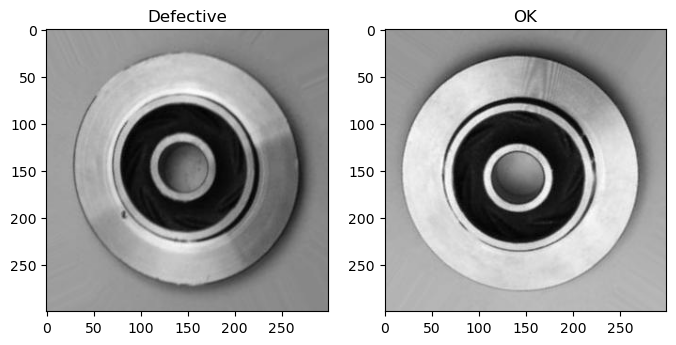

In [2]:
# Ploting images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(plt.imread(train_defective+os.listdir(train_defective)[0]))
axes[1].imshow(plt.imread(train_ok+os.listdir(train_ok)[0]))
axes[0].set_title('Defective')
axes[1].set_title('OK')
plt.show()

### EDA

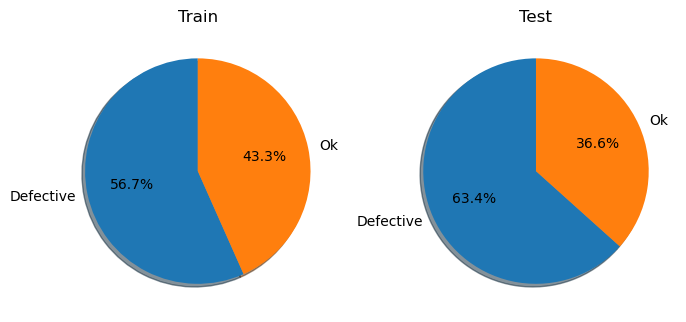

 Defective Training Images 	: 3758
 Ok Training Images 		: 2875

 Defective Testing Images 	: 453
 Ok Testing Images 		: 262


In [3]:
x_train = np.array([len(os.listdir(train_defective)),len(os.listdir(train_ok))])
x_test = np.array([len(os.listdir(test_defective)),len(os.listdir(test_ok))])
label = ['Defective','Ok']
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

print(' Defective Training Images \t: ' + str(len(os.listdir(train_defective))))
print(' Ok Training Images \t\t: ' + str(len(os.listdir(train_ok))))
print()
print(' Defective Testing Images \t: ' + str(len(os.listdir(test_defective))))
print(' Ok Testing Images \t\t: ' + str(len(os.listdir(test_ok))))

In [4]:
train_def = len(os.listdir(train_defective))
train_ok = len(os.listdir(train_ok))
test_def = len(os.listdir(test_defective))
test_ok = len(os.listdir(test_ok))
total_train = [train_def, train_ok]
total_test = [test_def, test_ok]
df = pd.DataFrame(data = [total_train, total_test], columns = ['Defective', 'Non-Defective'], index = ['Train_number','Test_number'])
df

,Defective,Non-Defective
Train_number,3758,2875
Test_number,453,262


<AxesSubplot:>

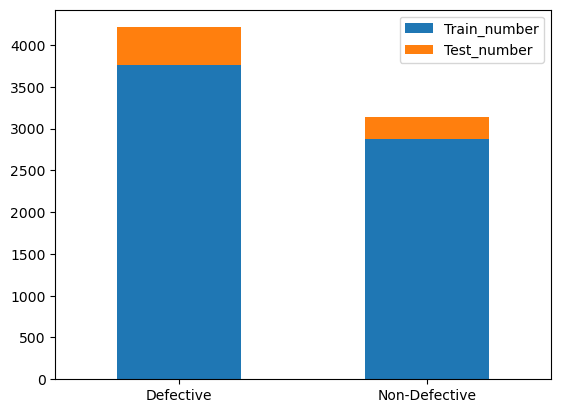

In [7]:
df.T.plot(kind = 'bar', stacked = 'True', rot = 0)


## Data loading and perprocessing

    - 0/1 Normalization 
    - Grayscale
    - input shape resize for CNN (300x300)
    
We normalize the pixel values in the range of 0 to 1. For this, we divide our pixel values by 255.

Resize our images to (300 x 300) , i.e. to grayscale mode.

Set the batch size to 64. Batch size is set because images are trained in batches. This improves the model while training.

Set the class mode to binary, as we only have 2 classes.

Set 30% of our training data as validation data.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for training 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (300, 300)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode': 'binary',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode': 'binary',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory='G:/Mtech - Sem 2/Deep Learning/Project/casting_data/train/', subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory='G:/Mtech - Sem 2/Deep Learning/Project/casting_data/train/', subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory='G:/Mtech - Sem 2/Deep Learning/Project/casting_data/test/', **arg_test)

Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


## CNN

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

### Bulding model

In [10]:
cnn = Sequential([ 
    Conv2D(32, 3, activation='relu', padding='same', strides=2,input_shape=img_size+(1,)),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(64, 3, activation='relu', padding='same', strides=2),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

cnn.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23104)             0         
                                                                 
 dense (Dense)               (None, 128)               2

### Training

In [11]:
history = cnn.fit(
    train ,
    validation_data=valid,
    epochs=30)

Epoch 1/30
73/73 [==============================] - 229s 3s/step - loss: 0.6925 - accuracy: 0.5851 - val_loss: 0.5979 - val_accuracy: 0.6023
Epoch 2/30
73/73 [==============================] - 102s 1s/step - loss: 0.5114 - accuracy: 0.7364 - val_loss: 0.4057 - val_accuracy: 0.8230
Epoch 3/30
73/73 [==============================] - 93s 1s/step - loss: 0.3588 - accuracy: 0.8376 - val_loss: 0.3332 - val_accuracy: 0.8728
Epoch 4/30
73/73 [==============================] - 109s 1s/step - loss: 0.2731 - accuracy: 0.8938 - val_loss: 0.2558 - val_accuracy: 0.9105
Epoch 5/30
73/73 [==============================] - 121s 2s/step - loss: 0.2288 - accuracy: 0.9113 - val_loss: 0.1873 - val_accuracy: 0.9402
Epoch 6/30
73/73 [==============================] - 100s 1s/step - loss: 0.1697 - accuracy: 0.9432 - val_loss: 0.1438 - val_accuracy: 0.9517
Epoch 7/30
73/73 [==============================] - 108s 1s/step - loss: 0.1414 - accuracy: 0.9539 - val_loss: 0.1352 - val_accuracy: 0.9598
Epoch 8/30
73/

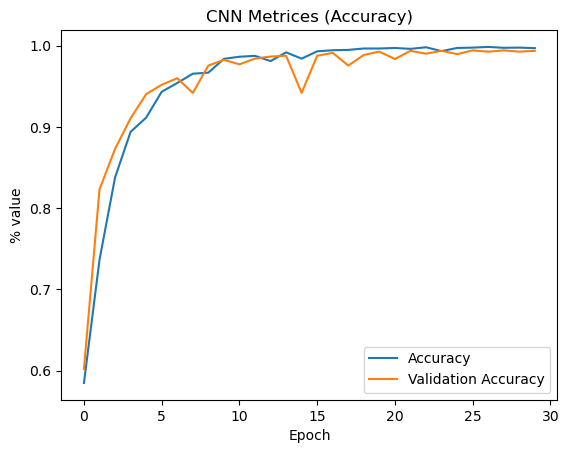

In [13]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

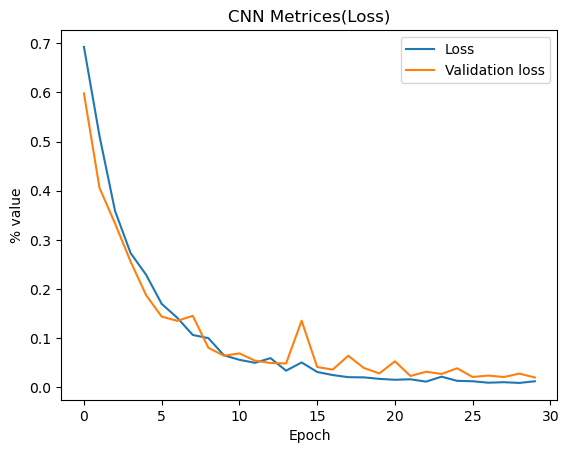

In [14]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

### Testing and evaluation

In [15]:
y_pred = cnn.predict(test)
y_pred = (y_pred >= 0.5).reshape(-1,)

12/12 [==============================] - 12s 1s/step


In [16]:
y_actual = test.classes[test.index_array]

#### Confusion matrix

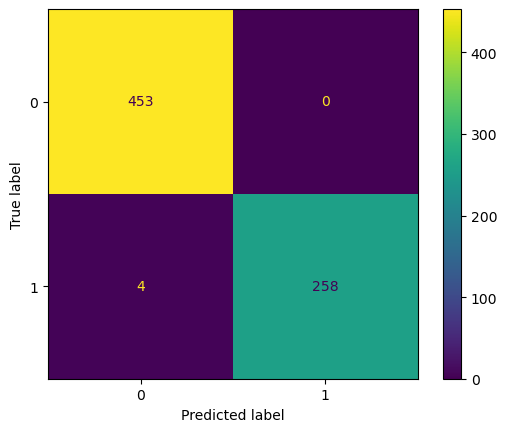

In [17]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Classification report

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9912    1.0000    0.9956       453
           1     1.0000    0.9847    0.9923       262

    accuracy                         0.9944       715
   macro avg     0.9956    0.9924    0.9940       715
weighted avg     0.9945    0.9944    0.9944       715

